# Anaerobic Digestion (AD)

In [1]:
import PFAS_SAT_ProcessModels as pspd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
pd.set_option('display.max_colwidth', 0)

## Model document

AD can accept food waste or wastewater treatment solids to stabilize them prior to aerobic curing and/or land application.
The residual solids from AD can be further dewatered and the aerobically cured prior to land application. The liquid
stream (digestate) may be returned to the AD process in some cases (e.g., a low solids food waste system) or sent to WWT.
While it is possible that PFAS are volatilized/aerosolized during digestion and/or aerobic curing, as noted earlier,
the default PFAS release to the air is zero.

During digestion, the feedstocks (e.g., WWT solids, food waste) partially biodegrade with the conversion of solids to
biogas. Model predictions of PFAS fate are based on achievement of equilibrium. The partition coefficient is used to
estimate the concentration of PFAS in the liquid and solids. VS destruction during digestion changes the equilibrium
PFAS distribution between the solid and aqueous phases. There are several different potential AD processes
(e.g., thermophilic, mesophilic, single stage, multi-stages). The AD process model in the SAT framework is
designed so that by changing default parameters, different AD systems can be represented.


<img src="../Images/ProcessModels/AD_Diagram-v2.png" alt="Drawing" style="width: 700px;"/>



### Assumptions and Limitations:

1. The model assumes that there is no water loss during anaerobic digestion, and that the C concentration in the solids
   remains constant.
2. Volatilization is assumed to be zero by default due to a lack of data. However, the user may assign a fraction of the PFAS
   that volatilizes/aerosolizes.
3. Future work is required to implement a dynamic model to account for changes in the organic C content over time as materials
   decompose in the reactor and during aerobic curing. 
4. We do not consider the possible conversion of "precursor" compounds to commonly measured PFAAs.
5. Anaerobic digestion processes are sometimes preceded by a thermal pre-treatment process for the purpose of enhancing
   methane production. Thermal pretreatment can also enhance precursor conversion to PFAAs. This can lead to an increase
   in aqueous PFAA concentrations across the process.

## Input Parameters for AD model

In [2]:
AD = pspd.AD()
AD.InputData.Data[['Category','Dictonary_Name','Parameter Name', 'Parameter Description', 'amount', 'unit','Reference']]

,Category,Dictonary_Name,Parameter Name,Parameter Description,amount,unit,Reference
0,AD parameters,AD,frac_PFAS_to_Vol,Fraction of PFAS lost to volatilization,0.00,fraction,
1,AD parameters,AD,frac_VS_loss,Fraction VS destruction during AD,0.55,fraction,
2,AD parameters,AD,frac_cured,Fraction of digestate cured,1.00,fraction,
3,AD parameters,AD,Reac_moist,Reactor moisture content _ wet,0.92,fraction,
4,Dewatering,Dew,Digestate_moist,Moisture Content of Solids Stream After Dewatering,0.76,fraction,
5,Curing Input,Curing,frac_C_lost,Fraction of organic C lost during curing,0.50,fraction C,
6,Curing Input,Curing,ts_end,Solids content at the end of curing,0.50,fraction ts,
7,Curing Input,Curing,bulk_dens,Bulk density of curing pile,400.00,kg/m3,
8,Curing Input,Curing,wind_ht,Curing windrow height,4.00,m,
9,Curing Input,Curing,wind_wid,Curing windrow width,6.00,m,


## Incoming Dewatered WWT Solids to AD

In [3]:
IncominWaste = pspd.IncomFlow()
IncominWaste.set_flow('Dewatered WWT Solids', 1000)
IncominWaste.calc()
DewateredWWTSolids = IncominWaste.Inc_flow
DewateredWWTSolids.report()

,Parameter,Unit,Amount
0,Mass flow,kg,1000
1,Solids flow,kg,200.0
2,Moisture flow,kg,800.0
3,VS flow,kg,120.0
4,Carbon flow,kg,76.0
5,PFOA,μg,934.565
6,PFOS,μg,3678.926
7,PFBA,μg,146.226
8,PFPeA,μg,365.103
9,PFHxA,μg,511.518


## PFAS balance in AD (50% of the AD solids is Cured)

In [4]:
AD.InputData.AD['frac_cured']['amount'] = 0.5
AD.calc(Inc_flow=DewateredWWTSolids)
AD.report(normalized=True)

,Volatilization,ADSolids,ADLiquids,Compost,Contact Water
PFOA,0.0,38.92,22.16,38.83,0.09
PFOS,0.0,48.06,3.88,48.04,0.02
PFBA,0.0,31.68,36.63,31.54,0.15
PFPeA,0.0,17.69,64.62,17.43,0.26
PFHxA,0.0,28.69,42.61,28.52,0.17
PFHpA,0.0,33.99,32.01,33.86,0.13
PFNA,0.0,45.30,9.40,45.26,0.04
PFDA,0.0,48.76,2.49,48.75,0.01
PFBS,0.0,21.41,57.19,21.18,0.23
PFHxS,0.0,46.65,6.70,46.62,0.03


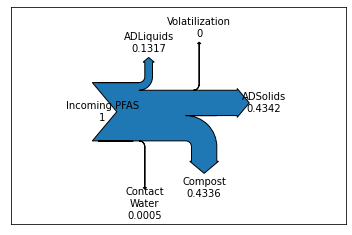

In [5]:
AD.plot_sankey(gap=0.8)

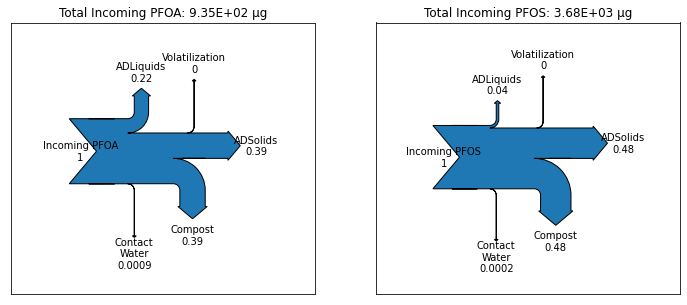

In [6]:
AD.plot_sankey_report(margin=0.9)

## PFAS balance in AD (AD solids are not Cured)

In [7]:
AD.InputData.AD['frac_cured']['amount'] = 0
AD.calc(Inc_flow=DewateredWWTSolids)
AD.report()

,Volatilization,ADSolids,ADLiquids,Compost,Contact Water
PFOA,0.0,727.434261,207.130739,0.0,0.0
PFOS,0.0,3536.048455,142.877545,0.0,0.0
PFBA,0.0,92.656402,53.569598,0.0,0.0
PFPeA,0.0,129.166403,235.936597,0.0,0.0
PFHxA,0.0,293.556374,217.961626,0.0,0.0
PFHpA,0.0,59.955306,28.232694,0.0,0.0
PFNA,0.0,338.078122,35.070878,0.0,0.0
PFDA,0.0,1513.581279,38.598721,0.0,0.0
PFBS,0.0,53.521082,71.496918,0.0,0.0
PFHxS,0.0,100.078296,7.186704,0.0,0.0


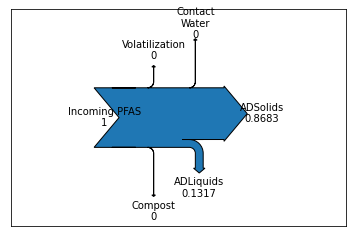

In [8]:
AD.plot_sankey()

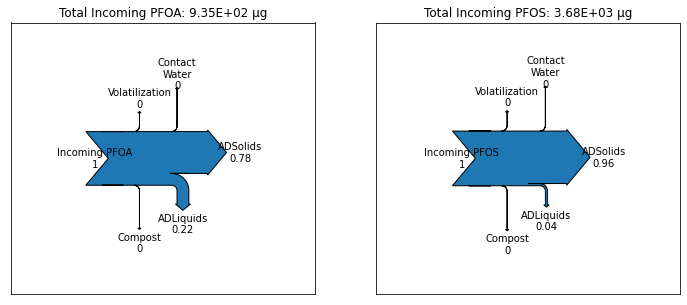

In [9]:
AD.plot_sankey_report()

## PFAS balance in AD (All AD solids are Cured)

In [10]:
AD.InputData.AD['frac_cured']['amount'] = 1
AD.calc(Inc_flow=DewateredWWTSolids)
AD.report(normalized=True)

,Volatilization,ADSolids,ADLiquids,Compost,Contact Water
PFOA,0.0,0.0,22.16,77.66,0.18
PFOS,0.0,0.0,3.88,96.09,0.03
PFBA,0.0,0.0,36.63,63.07,0.29
PFPeA,0.0,0.0,64.62,34.86,0.51
PFHxA,0.0,0.0,42.61,57.05,0.34
PFHpA,0.0,0.0,32.01,67.73,0.26
PFNA,0.0,0.0,9.40,90.53,0.08
PFDA,0.0,0.0,2.49,97.49,0.02
PFBS,0.0,0.0,57.19,42.35,0.46
PFHxS,0.0,0.0,6.70,93.25,0.05


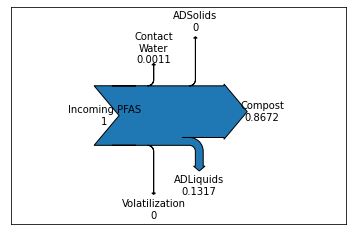

In [11]:
AD.plot_sankey()

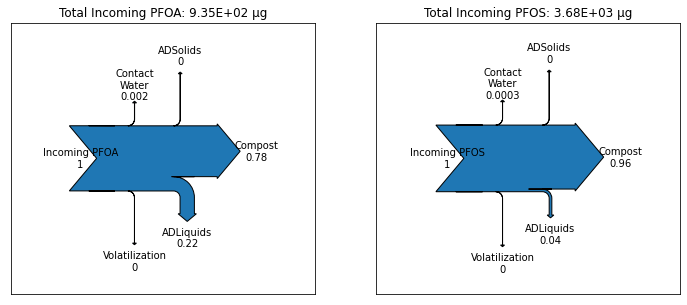

In [12]:
AD.plot_sankey_report(margin=0.9)

### Sensitivity to precipitation (Curing)

Text(0, 0.5, 'Percent of Incoming PFAS that \n remains in the Compost (%)')

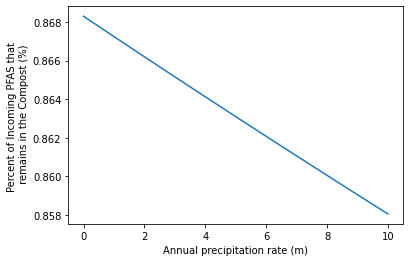

In [13]:
precip = np.linspace(0,10,30)
frac_remain = []
for i in precip:
    AD.InputData.Precip['ann_precip']['amount'] = i
    AD.calc(Inc_flow=DewateredWWTSolids)
    frac_remain.append(sum(AD.report()['Compost'])/sum(DewateredWWTSolids.PFAS))

plt.plot(precip,frac_remain)
plt.xlabel('Annual precipitation rate (m)')
plt.ylabel('Percent of Incoming PFAS that \n remains in the Compost (%)')